# **Introduction**
In this documentation, I will present a hybrid machine learning model that I have built for predicting student performance in a class. By using the power of Support Vector Machine (SVM), Gaussian Naive Bayes (GNB), and One-Hot Encoder (OHE) which is a decision tree, I aim to develop a robust and accurate model that incorporates various data inputs, such as class assignments, quizzes, class attendance, and internet usage, to predict student performance.

# **Problem Statement**
As an educator, I understand the importance of predicting student performance to identify students who may need additional support or interventions. To address this need, I set out to build a machine learning model that can effectively analyze multiple data sources, including class assignments, quizzes, class attendance, and internet usage, and predict student performance accurately.


# Importing Libraies for the model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Input Variables:
Selected the following input variables for my hybrid model:

1.   Class Assignments: Scores or grades obtained by students in different class assignments or projects.

2.   Quizzes: Performance metrics in quizzes or short assessments conducted during the course.
3.    Class Attendance: Information on student attendance, such as the number of classes attended or attendance percentage.

4.  Internet Usage: Metrics related to internet usage, such as time spent on online learning platforms or engagement with online educational resources.

# Output Variable:
The output variable is the predicted student performance, represented as a binary classification (e.g., high-performing or low-performing) or a multi-class classification (e.g., grades A, B, C, D, or F).


In [2]:
sheet1 = pd.read_excel('Data.xlsx')
sheet1['Assignment Score'] = sheet1.iloc[:,18:23].sum(axis=1)
sheet1['Class Attendance'] = sheet1.iloc[:,7:17].sum(axis=1)
sheet1

,Response,Full Name,What is your gender,The internet in my home is reliable in terms of signal strength,The internet in terms of signal strength on campus is reliable,The lighten system in my classroom and dormitory is reliable,The lighten system on campus is reliable,Class attendance checklist Monday,Class attendance checklist Tuesday,Class attendance checklist Wednesday,...,LMS attendance checklist (number of hours students chat tutors) (Thursday),LMS attendance checklist (number of hours students chat tutors) (Friday),LMS Assignments,LMS Quizzes,LMS access to notes checklist,GPA,What feature in the Learning management system contribute mostly in your academic performance and why?,How do you expect your academic performance to be improved by,Assignment Score,Class Attendance
0,1,CASTRO ANANE,1,4,3,3,1,1,1,1,...,1,1,1,1,1,3.9,CHAT,Governtment: Building of more lecture rooms an...,5,10
1,2,BEKOE SIMON BOADU,2,3,1,1,1,1,1,1,...,1,1,1,1,1,3.8,FORUMN,School authorities: They should continue to r...,5,10
2,3,JANET BAWUAH AMPONSAH,1,4,2,3,3,1,0,0,...,1,1,1,1,1,3.8,ZOOM/VIDEO LECTURES,School authorities: To provide students handb...,5,8
3,4,ADELAIDE POKUAA GYAU,1,2,2,1,2,1,1,1,...,1,1,1,1,1,3.8,FILE,Tutors: They should be always be regular and p...,5,10
4,5,GODFRED ODURO ANOKYE,1,2,2,2,2,1,1,1,...,1,1,1,1,1,3.8,CHAT,Government: The government should pay the allo...,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,172,MAVIS OPPONG,2,2,2,1,1,1,1,1,...,1,1,1,1,1,1.5,ZOOM/VIDEO LECTURES,Tutors: Tutors must use a valid appropriate me...,5,10
171,173,MAX KYEI ASARE,2,1,2,2,1,1,1,1,...,1,1,1,1,1,1.4,ZOOM/VIDEO LECTURES,Government: The government shoulde provide a c...,5,10
172,174,OWUSU ACHEAMPONG VASTY,2,1,1,1,1,1,1,1,...,1,1,1,1,1,1.4,CHAT,School authorities: The school must provide a ...,5,10
173,175,PRISCILLA AGYAPOMAA,2,2,1,2,1,1,1,1,...,1,1,1,1,1,1.4,ZOOM/VIDEO LECTURES,Tutors: Tutors should consider the interest of...,5,10


## Pruning the Dataset
The resulting DataFrame, 'gen1', 'gen2', 'gen3', would contain the original data except for the columns that were dropped, effectively retaining only the 'Class Attendance' column and removing the original columns 0 to 29.

In [3]:
import warnings
warnings.filterwarnings("ignore")

week1 = pd.read_excel('attendance 2.xlsx')
week1['Week Two Attendance'] = week1.iloc[:, 1:16].sum(axis=1)
column_groups = [list(range(0, 16))]
week1.drop(week1.columns[column_groups], axis=1, inplace=True)

week2 = pd.read_excel('attendance 3.xlsx')
week2['Week Three Attendance'] = week2.iloc[:, 1:16].sum(axis=1)
column_groups = [list(range(0, 16))]
week2.drop(week2.columns[column_groups], axis=1, inplace=True)

week3 = pd.read_excel('attendance 4.xlsx')
week3['Week Four Attendance'] = week3.iloc[:, 1:16].sum(axis=1)
column_groups = [list(range(0, 16))]
week3.drop(week3.columns[column_groups], axis=1, inplace=True)

week5 = pd.read_excel('Week 6.xlsx')
week5['Week Six Attendance'] = week5.iloc[:, 1:16].sum(axis=1)
column_groups = [list(range(0, 16))]
week5.drop(week5.columns[column_groups], axis=1, inplace=True)

week4 = pd.read_excel('attendance 5.xlsx')
week4['Week Five Attendance'] = week4.iloc[:, 1:16].sum(axis=1)
column_groups = [list(range(0, 16))]
week4.drop(week4.columns[column_groups], axis=1, inplace=True)

week6 = pd.read_excel('Week 7.xlsx')
week6['Week Six Attendance'] = week6.iloc[:, 1:16].sum(axis=1)
column_groups = [list(range(0, 16))]
week6.drop(week6.columns[column_groups], axis=1, inplace=True)

combined_file = pd.concat([week1, week2, week3, week4, week5, week6, sheet1], axis=1)
combined_file['Total Attendance'] = combined_file.iloc[:, 1:17].sum(axis=1)
cdf = combined_file
combined_file

,Week Two Attendance,Week Three Attendance,Week Four Attendance,Week Five Attendance,Week Six Attendance,Week Six Attendance,Response,Full Name,What is your gender,The internet in my home is reliable in terms of signal strength,...,LMS attendance checklist (number of hours students chat tutors) (Friday),LMS Assignments,LMS Quizzes,LMS access to notes checklist,GPA,What feature in the Learning management system contribute mostly in your academic performance and why?,How do you expect your academic performance to be improved by,Assignment Score,Class Attendance,Total Attendance
0,13,13,12,13,14,13,1,CASTRO ANANE,1,4,...,1,1,1,1,3.9,CHAT,Governtment: Building of more lecture rooms an...,5,10,82
1,11,11,12,8,14,14,2,BEKOE SIMON BOADU,2,3,...,1,1,1,1,3.8,FORUMN,School authorities: They should continue to r...,5,10,73
2,8,13,14,15,14,14,3,JANET BAWUAH AMPONSAH,1,4,...,1,1,1,1,3.8,ZOOM/VIDEO LECTURES,School authorities: To provide students handb...,5,8,88
3,13,13,9,15,14,14,4,ADELAIDE POKUAA GYAU,1,2,...,1,1,1,1,3.8,FILE,Tutors: They should be always be regular and p...,5,10,81
4,13,13,14,15,15,15,5,GODFRED ODURO ANOKYE,1,2,...,1,1,1,1,3.8,CHAT,Government: The government should pay the allo...,5,10,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,13,13,12,13,13,13,172,MAVIS OPPONG,2,2,...,1,1,1,1,1.5,ZOOM/VIDEO LECTURES,Tutors: Tutors must use a valid appropriate me...,5,10,248
171,13,13,14,15,14,11,173,MAX KYEI ASARE,2,1,...,1,1,1,1,1.4,ZOOM/VIDEO LECTURES,Government: The government shoulde provide a c...,5,10,252
172,13,13,14,15,14,15,174,OWUSU ACHEAMPONG VASTY,2,1,...,1,1,1,1,1.4,CHAT,School authorities: The school must provide a ...,5,10,255
173,13,11,13,14,15,15,175,PRISCILLA AGYAPOMAA,2,2,...,1,1,1,1,1.4,ZOOM/VIDEO LECTURES,Tutors: Tutors should consider the interest of...,5,10,255


# Data Preprocessing 1
Before building the hybrid model, I performed several preprocessing steps to ensure data quality and compatibility with the chosen classifiers.


### Dataset Description:
For this project, I gathered a dataset that includes information from class assignments, quizzes, class attendance records, and internet usage. Each data source has its corresponding attributes that provide relevant insights into student performance.


In [4]:
combined_file.dtypes

Week Two Attendance                                                                                         int64
Week Three Attendance                                                                                       int64
Week Four Attendance                                                                                        int64
Week Five Attendance                                                                                        int64
Week Six Attendance                                                                                         int64
Week Six Attendance                                                                                         int64
Response                                                                                                    int64
Full Name                                                                                                  object
What is your gender                                                                     

In [5]:
combined_file.nunique()

Week Two Attendance                                                                                        10
Week Three Attendance                                                                                       8
Week Four Attendance                                                                                        8
Week Five Attendance                                                                                        9
Week Six Attendance                                                                                         8
Week Six Attendance                                                                                         7
Response                                                                                                  175
Full Name                                                                                                 147
What is your gender                                                                                         2
The intern

In [6]:
combined_file = combined_file.drop([
    'Response',
    'Full Name',
    'What feature in the Learning management system contribute mostly in your academic performance and why?',
    'Class exercise checklist',
    'LMS attendance checklist (number of hours students chat tutors) (Monday)',
    'LMS attendance checklist (number of hours students chat tutors) (Tuesday)',
    'LMS attendance checklist (number of hours students chat tutors) (Wednesday)',
    'LMS attendance checklist (number of hours students chat tutors) (Thursday)',
    'LMS attendance checklist (number of hours students chat tutors) (Friday)'
                                    ], axis=1)
combined_file.head()

,Week Two Attendance,Week Three Attendance,Week Four Attendance,Week Five Attendance,Week Six Attendance,Week Six Attendance,What is your gender,The internet in my home is reliable in terms of signal strength,The internet in terms of signal strength on campus is reliable,The lighten system in my classroom and dormitory is reliable,...,Assignments,Quizzes,LMS Assignments,LMS Quizzes,LMS access to notes checklist,GPA,How do you expect your academic performance to be improved by,Assignment Score,Class Attendance,Total Attendance
0,13,13,12,13,14,13,1,4,3,3,...,1,1,1,1,1,3.9,Governtment: Building of more lecture rooms an...,5,10,82
1,11,11,12,8,14,14,2,3,1,1,...,1,1,1,1,1,3.8,School authorities: They should continue to r...,5,10,73
2,8,13,14,15,14,14,1,4,2,3,...,1,1,1,1,1,3.8,School authorities: To provide students handb...,5,8,88
3,13,13,9,15,14,14,1,2,2,1,...,1,1,1,1,1,3.8,Tutors: They should be always be regular and p...,5,10,81
4,13,13,14,15,15,15,1,2,2,2,...,1,1,1,1,1,3.8,Government: The government should pay the allo...,5,10,90


In [60]:
scores = sheet1.columns[sheet1.columns.str.contains('gender ')].tolist()
for score in scores:
    sns.barplot(x=sheet1[score], y=sheet1['Assignment Score'])
    plt.show()

    for score in scores:
    sns.barplot(x=sheet1[score], y=sheet1['Class Attendance'])
    plt.show()

In [65]:
ct = sheet1.columns[sheet1.columns.str.contains('internet ')].tolist()

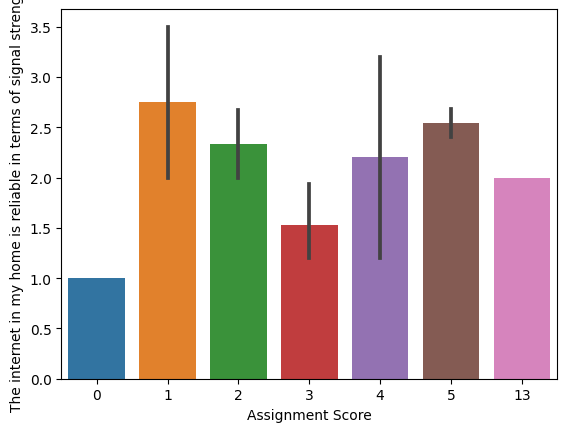

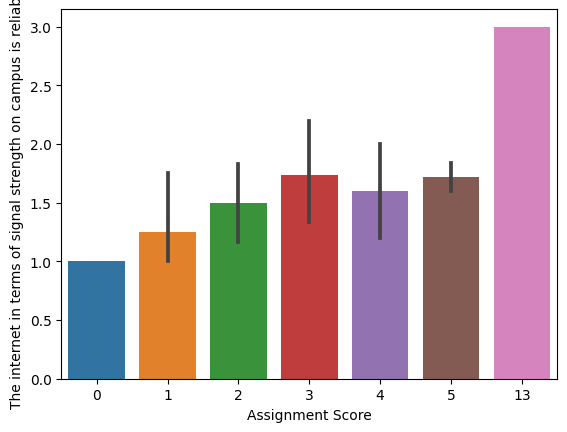

In [66]:
for ct in ct:
    sns.barplot(y=sheet1[ct], x=sheet1['Assignment Score'])
    plt.show()

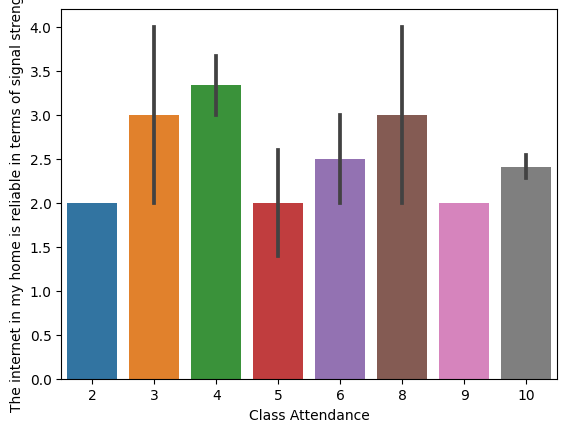

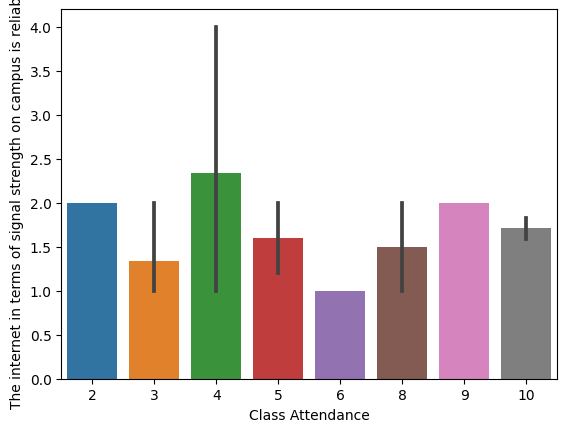

In [67]:
ct = sheet1.columns[sheet1.columns.str.contains('internet ')].tolist()
for ct in ct:
    sns.barplot(y=sheet1[ct], x=sheet1['Class Attendance'])
    plt.show()

In [69]:
scores = sheet1.columns[sheet1.columns.str.contains('lighten ')].tolist()
scores

['The lighten system in my classroom and dormitory is reliable',
 'The lighten system on campus is reliable ']

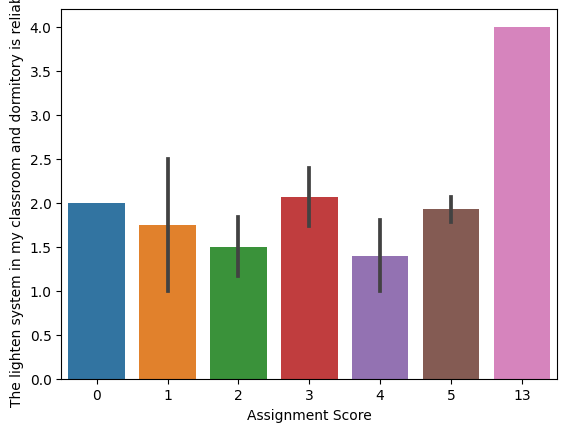

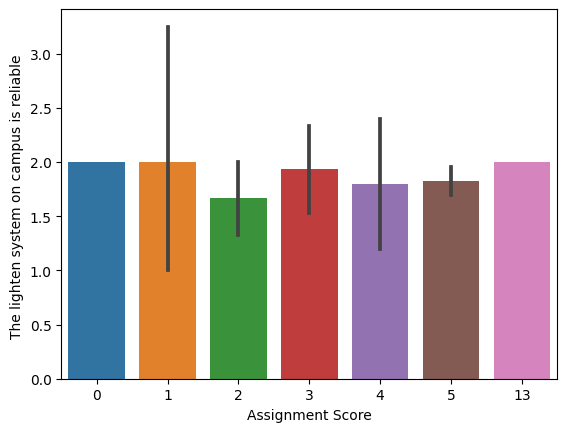

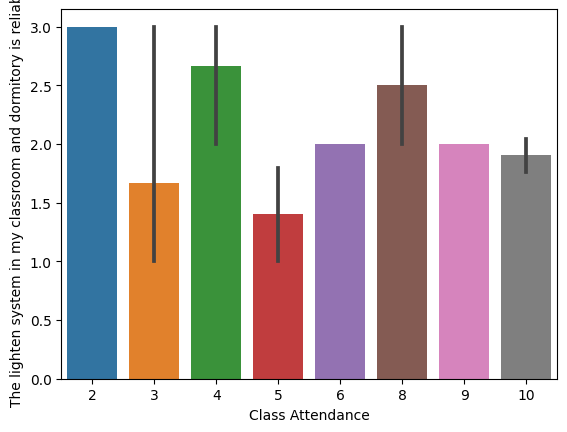

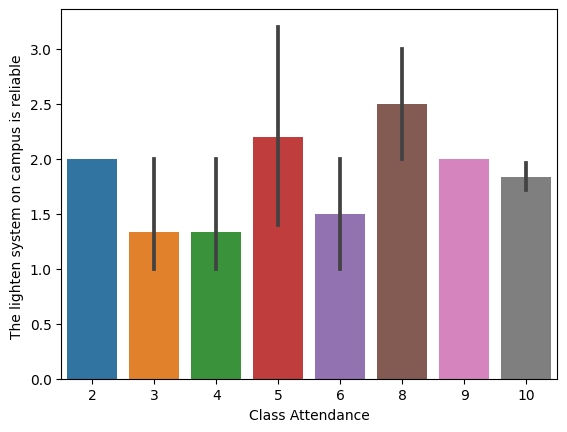

In [70]:
for score in scores:
    sns.barplot(y=sheet1[score], x=sheet1['Assignment Score'])
    plt.show()

for score in scores:
    sns.barplot(y=sheet1[score], x=sheet1['Class Attendance'])
    plt.show()

## Checking the skewness and kurtosis
the code generates a histogram plot with a kernel density estimate for a specific variable ('score') from the 'combined_file' DataFrame. The plot provides insights into the distribution of the data, while the text annotation displays the skewness and kurtosis values, providing additional statistical information about the variable's shape.

In [13]:
scores = combined_file.columns[combined_file.columns.str.contains('Total Attendance')].tolist()
scores

['Total Attendance']

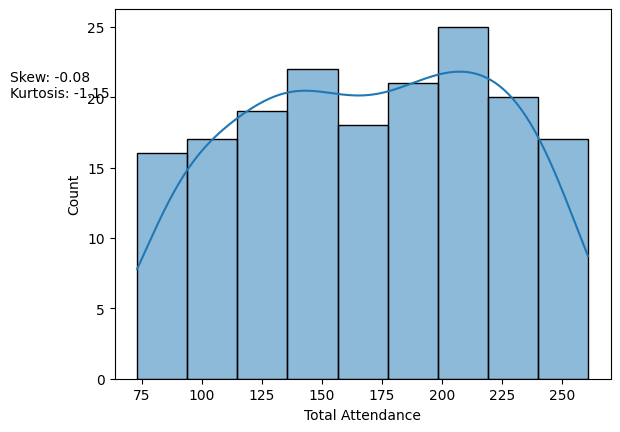

In [14]:
for score in scores:
    sns.histplot(combined_file[score], element='bars', kde=True)
    plt.text(x=20, y=20, s=f"Skew: {round(combined_file[score].skew(),2)}\nKurtosis: {round(combined_file[score].kurt(),2)}")
    plt.show()

In [15]:
combined_file.describe()

,Week Two Attendance,Week Three Attendance,Week Four Attendance,Week Five Attendance,Week Six Attendance,Week Six Attendance,What is your gender,The internet in my home is reliable in terms of signal strength,The internet in terms of signal strength on campus is reliable,The lighten system in my classroom and dormitory is reliable,...,Prep attendance checklist Friday,Assignments,Quizzes,LMS Assignments,LMS Quizzes,LMS access to notes checklist,GPA,Assignment Score,Class Attendance,Total Attendance
count,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,...,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000
mean,12.234286,12.480000,13.320000,14.182857,13.920000,14.045714,1.514286,2.428571,1.702857,1.914286,...,0.960000,0.914286,0.954286,0.937143,0.965714,0.925714,2.868571,4.622857,9.514286,169.680000
std,1.754132,1.294728,1.381487,1.462459,1.580921,1.258612,0.501230,0.860557,0.737145,0.883157,...,0.196521,0.280745,0.209464,0.243402,0.182484,0.262988,0.737646,1.191706,1.596898,51.782596
min,4.000000,6.000000,7.000000,5.000000,8.000000,8.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.300000,0.000000,2.000000,73.000000
25%,13.000000,13.000000,13.000000,14.000000,14.000000,14.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.550000,5.000000,10.000000,127.000000
50%,13.000000,13.000000,14.000000,15.000000,14.000000,14.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.100000,5.000000,10.000000,170.000000
75%,13.000000,13.000000,14.000000,15.000000,15.000000,15.000000,2.000000,3.000000,2.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.400000,5.000000,10.000000,212.000000
max,13.000000,13.000000,14.000000,15.000000,15.000000,15.000000,2.000000,4.000000,4.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.900000,13.000000,10.000000,261.000000


## Data Preprocessing 2

---



In [16]:
cdf = cdf.drop([
  'Full Name',
 'The internet in my home is reliable in terms of signal strength ',
 'The internet in terms of signal strength on campus is reliable ',
 'The lighten system in my classroom and dormitory is reliable',
 'The lighten system on campus is reliable ',
 'Class attendance checklist Monday ',
 'Class attendance checklist Tuesday',
 'Class attendance checklist Wednesday',
 'Class attendance checklist Thursday',
 'Class attendance checklist Friday',
 'Prep attendance checklist Monday ',
 'Prep attendance checklist Tuesday',
 'Prep attendance checklist Wednesday',
 'Prep attendance checklist Thursday',
 'Prep attendance checklist  Friday',
 'Class exercise checklist',
  "Week Six Attendance",
  "Response",
  "Class Attendance",
  "Total Attendance",
  "Assignments",
 'LMS attendance checklist (number of hours students chat tutors) (Monday)',
 'LMS attendance checklist (number of hours students chat tutors) (Tuesday)',
 'LMS attendance checklist (number of hours students chat tutors) (Wednesday)',
 'LMS attendance checklist (number of hours students chat tutors) (Thursday)',
 'LMS attendance checklist (number of hours students chat tutors) (Friday)',
 'LMS Assignments',
 'Quizzes',
 'LMS access to notes checklist',
 'What feature in the Learning management system contribute mostly in your academic performance and why?',
 'How do you expect your academic performance to be improved by',
 ], axis=1)
cdf.head()

,Week Two Attendance,Week Three Attendance,Week Four Attendance,Week Five Attendance,What is your gender,LMS Quizzes,GPA,Assignment Score
0,13,13,12,13,1,1,3.9,5
1,11,11,12,8,2,1,3.8,5
2,8,13,14,15,1,1,3.8,5
3,13,13,9,15,1,1,3.8,5
4,13,13,14,15,1,1,3.8,5


In [17]:
from numpy.core.fromnumeric import sort
check_missing = cdf.isnull().sum() * 100 / cdf.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

<Axes: >

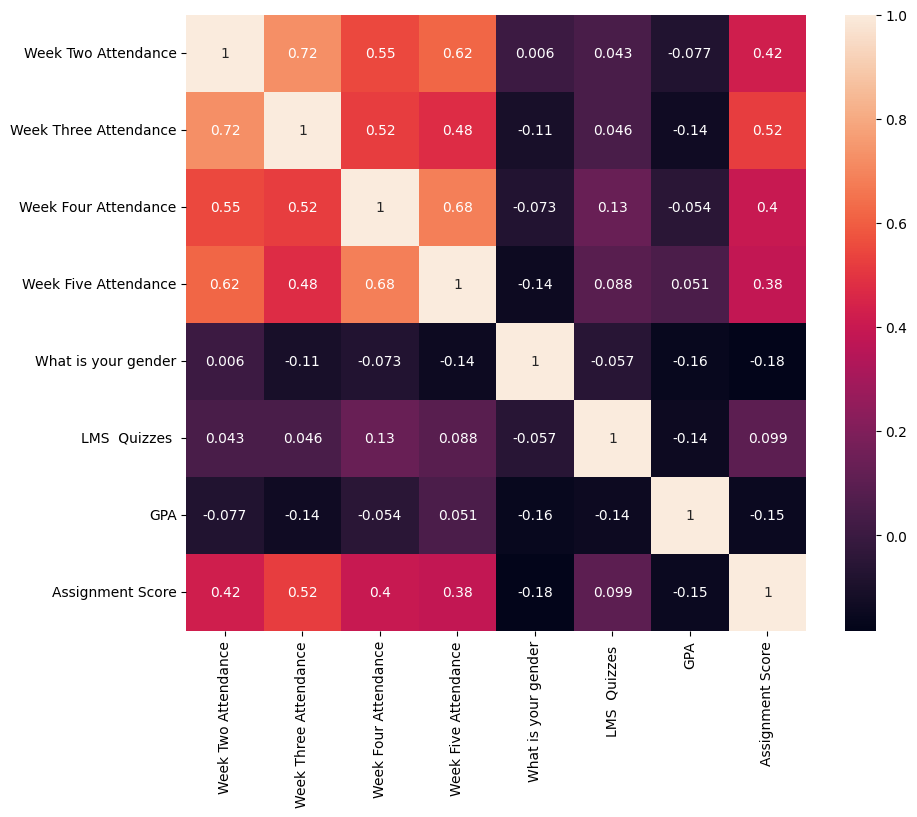

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(cdf.corr(), fmt='.2g', annot=True)

In [19]:
from sklearn.model_selection import train_test_split

cdf['GPA'] = cdf['GPA'].astype(int)
X= cdf.drop('What is your gender', axis=1)
y = cdf['What is your gender']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.model_selection import train_test_split

selected_column = ['Week Two Attendance', 'Week Three Attendance',  'Week Four Attendance', 'Week Five Attendance', 'GPA', 'Assignment Score']

train_df, test_df = train_test_split(cdf, test_size=0.2, random_state=42)

train_z_score = np.abs(train_df[selected_column] - train_df[selected_column].mean())/train_df[selected_column]

threshold = 3

train_df_no_outliers = train_df[train_z_score <= threshold]

## Decission Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.model_selection import GridSearchCV as gs
dtree = dtc(class_weight='balanced')
param_grid = {
    'max_depth' : [3, 4, 5, 6, 7, 8],
    'min_samples_split' : [2, 3, 4],
    'min_samples_leaf' : [1, 2, 3, 4],
    'random_state' : [0, 20, 42]
}

grid_search_dtree = gs(dtree, param_grid, cv =5, error_score='raise')
# grid_search_dtree.fit(X_train, y_train)
# grid_search_dtree.best_params_

In [22]:
grid_search_dtree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'random_state': [0, 20, 42]})

In [23]:
grid_search_dtree.best_params_

{'max_depth': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'random_state': 0}

In [24]:
from sklearn.tree import DecisionTreeClassifier as dtc
dtree = dtc(random_state= 20, max_depth=3, min_samples_leaf=3, min_samples_split=2, class_weight='balanced')
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, min_samples_leaf=3,
                       random_state=20)

In [25]:
from sklearn.metrics import accuracy_score
y_pred_dtree = dtree.predict(X_test)
print("Accuracy Score: ", round(accuracy_score(y_test, y_pred_dtree) * 100, 2), "%")

Accuracy Score:  62.86 %


In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dtree))

              precision    recall  f1-score   support

           1       0.62      0.90      0.73        20
           2       0.67      0.27      0.38        15

    accuracy                           0.63        35
   macro avg       0.64      0.58      0.56        35
weighted avg       0.64      0.63      0.58        35



Text(0.5, 1.0, 'Accuracy Score for the Decision Tree Model: 0.6285714285714286')

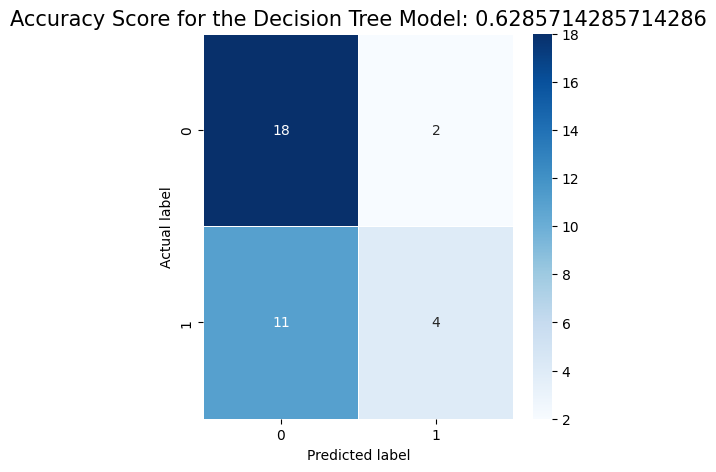

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_dtree)
plt.figure(figsize=(5,5))
sns.heatmap(data = cm, linewidths = 0.5, annot = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for the Decision Tree Model: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

# GaussianNB

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV as gs
gnb = GaussianNB()
param_grid = {
    'var_smoothing' : [0, 0.2, 0.5, 0.7, 0.9]
}

grid_search_gnb = gs(gnb, param_grid, cv =5)
# grid_search.fit(X_train, y_train)
# grid_search.best_params_

In [28]:
grid_search_gnb.fit(X_train, y_train)
grid_search_gnb.best_params_

{'var_smoothing': 0}

In [29]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB(var_smoothing= 0)
gnb.fit(X_train, y_train)

GaussianNB(var_smoothing=0)

In [30]:
from sklearn.metrics import accuracy_score
y_pred_gnb = gnb.predict(X_test)
print("Accuracy Score: ", round(accuracy_score(y_test, y_pred_gnb) * 100, 2), "%")

Accuracy Score:  51.43 %


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           1       0.57      0.65      0.60        20
           2       0.42      0.33      0.37        15

    accuracy                           0.51        35
   macro avg       0.49      0.49      0.49        35
weighted avg       0.50      0.51      0.50        35



Text(0.5, 1.0, 'Accuracy Score for the GaussianNB Model: 0.5142857142857142')

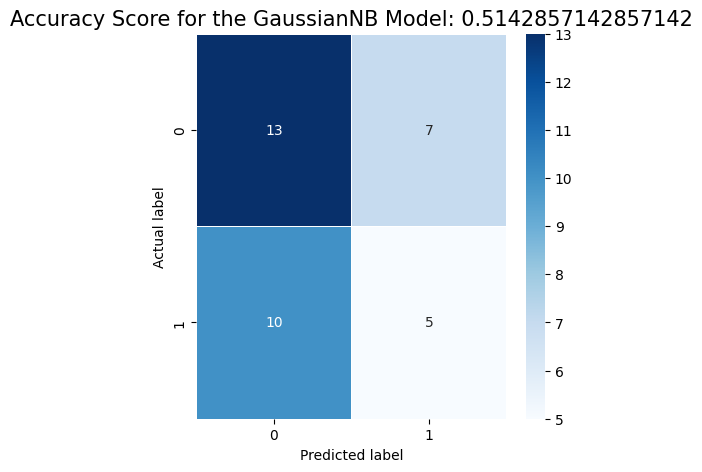

In [61]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_gnb)
plt.figure(figsize=(5,5))
sns.heatmap(data = cm, linewidths = 0.5, annot = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for the GaussianNB Model: {0}'.format(gnb.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

In [32]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimator_list = [
    ('dtree',dtree),
    ('gnb',gnb)]

stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression()
)

stack_model.fit(X_train, y_train)

StackingClassifier(estimators=[('dtree',
                                DecisionTreeClassifier(class_weight='balanced',
                                                       max_depth=3,
                                                       min_samples_leaf=3,
                                                       random_state=20)),
                               ('gnb', GaussianNB(var_smoothing=0))],
                   final_estimator=LogisticRegression())

In [33]:
from sklearn.metrics import accuracy_score
y_pred_stack = stack_model.predict(X_test)
print("Accuracy Score: ", round(accuracy_score(y_test, y_pred_stack) * 100, 2), "%")

Accuracy Score:  60.0 %


In [48]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC()
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 0.5, 1]
}

grid_search_svc = GridSearchCV(svc, param_grid, cv=5)

In [49]:
grid_search_svc.fit(X_train, y_train)
grid_search_svc.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}

In [50]:
from sklearn.svm import SVC
svc = SVC(C= 1, gamma= 0.1, kernel= 'linear')
svc.fit(X_train, y_train)

SVC(C=1, gamma=0.1, kernel='linear')

In [51]:
from sklearn.metrics import accuracy_score
y_pred_svc = svc.predict(X_test)
print("Accuracy Score: ", round(accuracy_score(y_test, y_pred_svc) * 100, 2), "%")

Accuracy Score:  54.29 %


In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           1       0.60      0.60      0.60        20
           2       0.47      0.47      0.47        15

    accuracy                           0.54        35
   macro avg       0.53      0.53      0.53        35
weighted avg       0.54      0.54      0.54        35



Text(0.5, 1.0, 'Accuracy Score for the SVC Model: 0.5428571428571428')

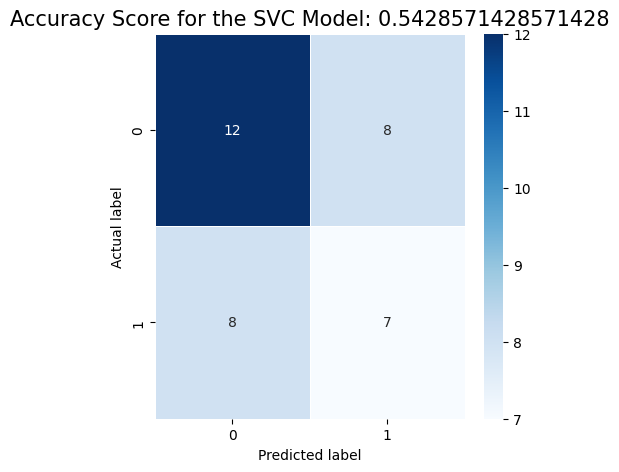

In [53]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(5,5))
sns.heatmap(data = cm, linewidths = 0.5, annot = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for the SVC Model: {0}'.format(svc.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

In [57]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimator_list = [
    ('dtree',dtree),
    ('gnb',gnb),
     ('svc',svc)]

sec_stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression()
)

sec_stack_model.fit(X_train, y_train)

StackingClassifier(estimators=[('dtree',
                                DecisionTreeClassifier(class_weight='balanced',
                                                       max_depth=3,
                                                       min_samples_leaf=3,
                                                       random_state=20)),
                               ('gnb', GaussianNB(var_smoothing=0)),
                               ('svc', SVC(C=1, gamma=0.1, kernel='linear'))],
                   final_estimator=LogisticRegression())

In [58]:
from sklearn.metrics import accuracy_score
y_pred_stack = sec_stack_model.predict(X_test)
print("Accuracy Score: ", round(accuracy_score(y_test, y_pred_stack) * 100, 2), "%")

Accuracy Score:  60.0 %
